Autoregressive (AR) Model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.arima.model import ARIMA

In [5]:
# Set a random seed for reproducibility
np.random.seed(0)

In [6]:
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
# Make sure your "Month" column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Sorting the data by date (if not sorted)
data = data.sort_values(by='Month')

# Resetting the index
data.set_index('Month', inplace=True)
 
data.dropna(inplace=True)

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


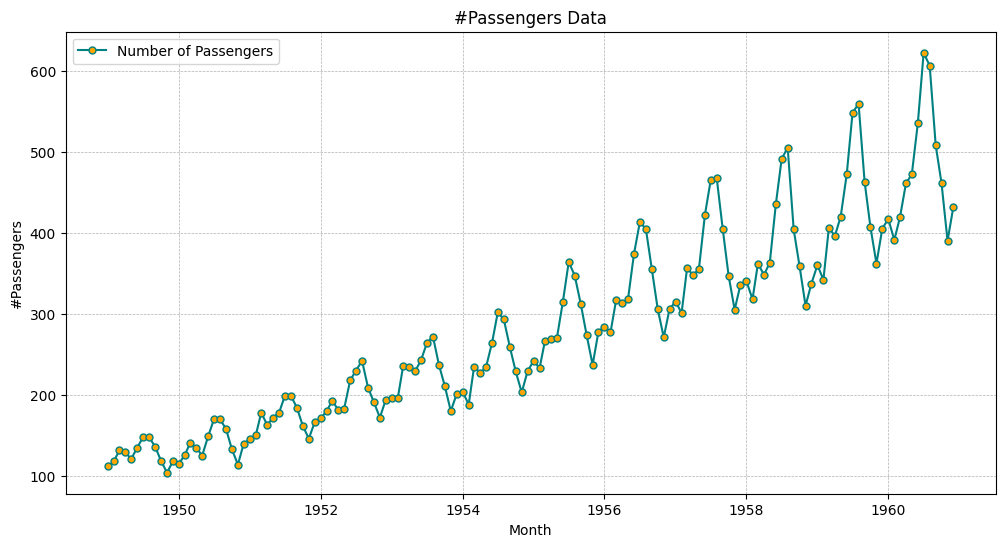

In [9]:
# Visualize the data with enhanced colors and grid lines
plt.figure(figsize=(12, 6))
plt.plot(data['#Passengers'], label='Number of Passengers', color='teal', linestyle='-', marker='o', markerfacecolor='orange', markersize=5)
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.title('#Passengers Data')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


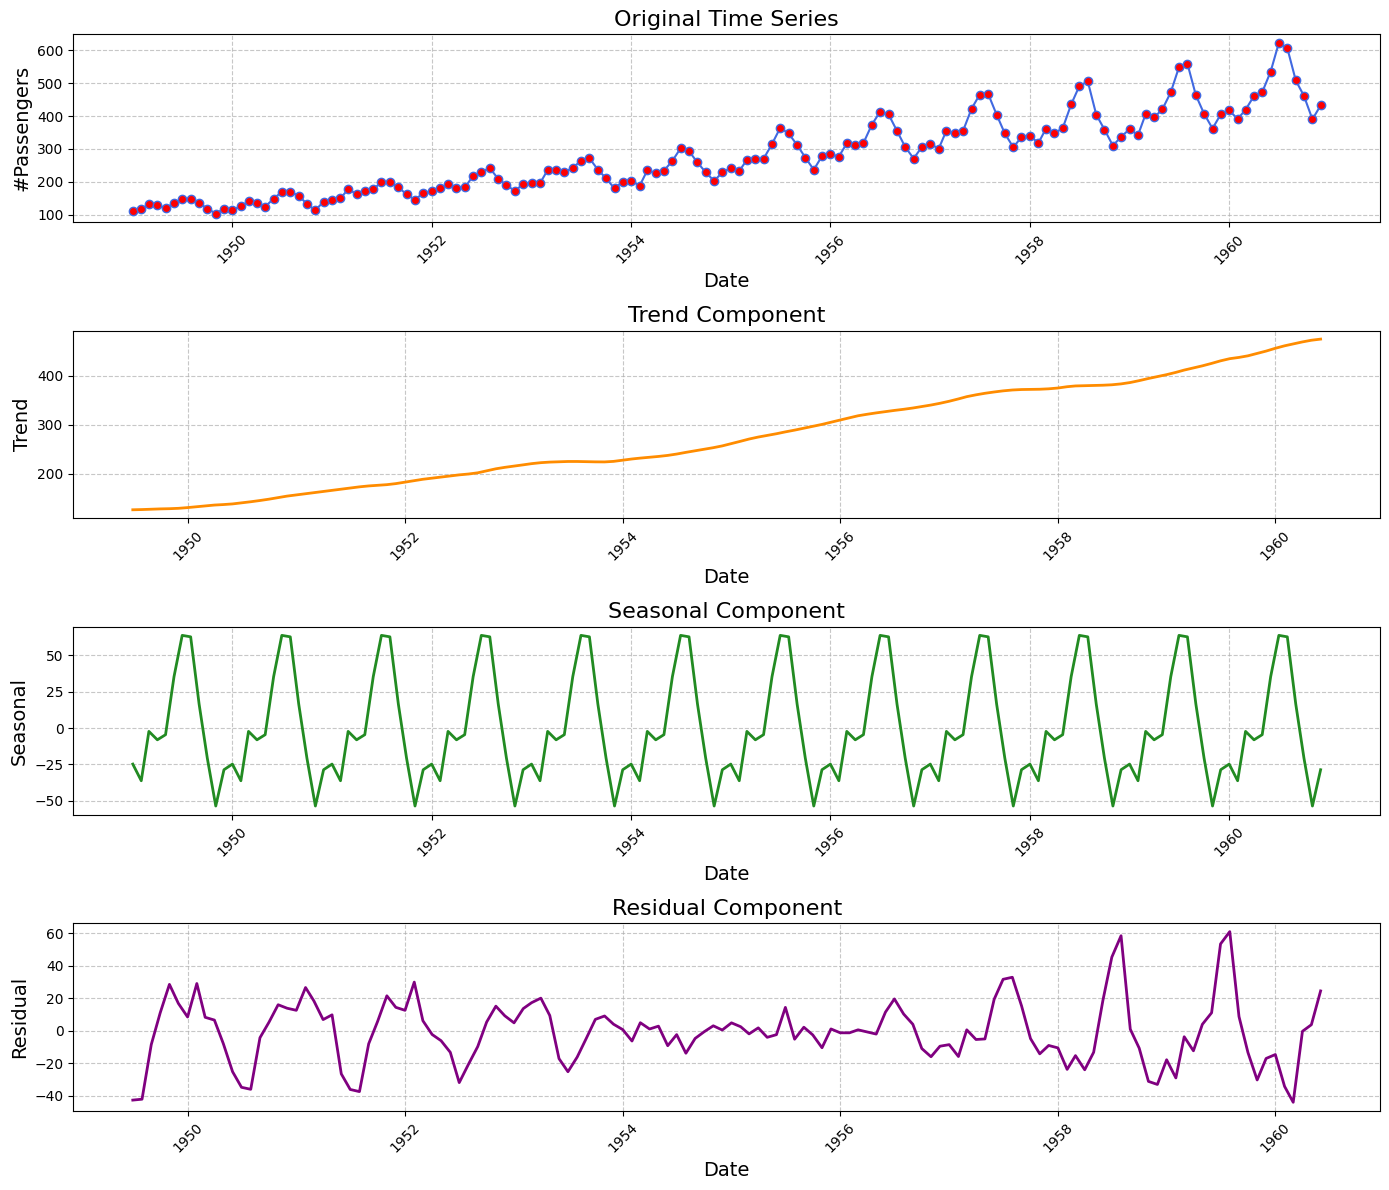

In [10]:
# Perform the seasonal decomposition
result = seasonal_decompose(data['#Passengers'], model='additive')

# Plot the decomposition
plt.figure(figsize=(14, 12))

# Original Data
plt.subplot(4, 1, 1)
plt.plot(data.index, data['#Passengers'], color='royalblue', linestyle='-', marker='o', markerfacecolor='red', markersize=6)
plt.title('Original Time Series', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('#Passengers', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend.index, result.trend, color='darkorange', linestyle='-', linewidth=2)
plt.title('Trend Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trend', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal.index, result.seasonal, color='forestgreen', linestyle='-', linewidth=2)
plt.title('Seasonal Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Seasonal', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid.index, result.resid, color='purple', linestyle='-', linewidth=2)
plt.title('Residual Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
   
# Adding lag features to the DataFrame
for i in range(1, 13):  # Creating lag features up to 5 days
    data[f'Lag_{i}'] = data['#Passengers'].shift(i)
 
# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)
 
# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
 
# Define the input features (lag features) and target variable
 
y_train = train_data['#Passengers']
 
y_test = test_data['#Passengers']

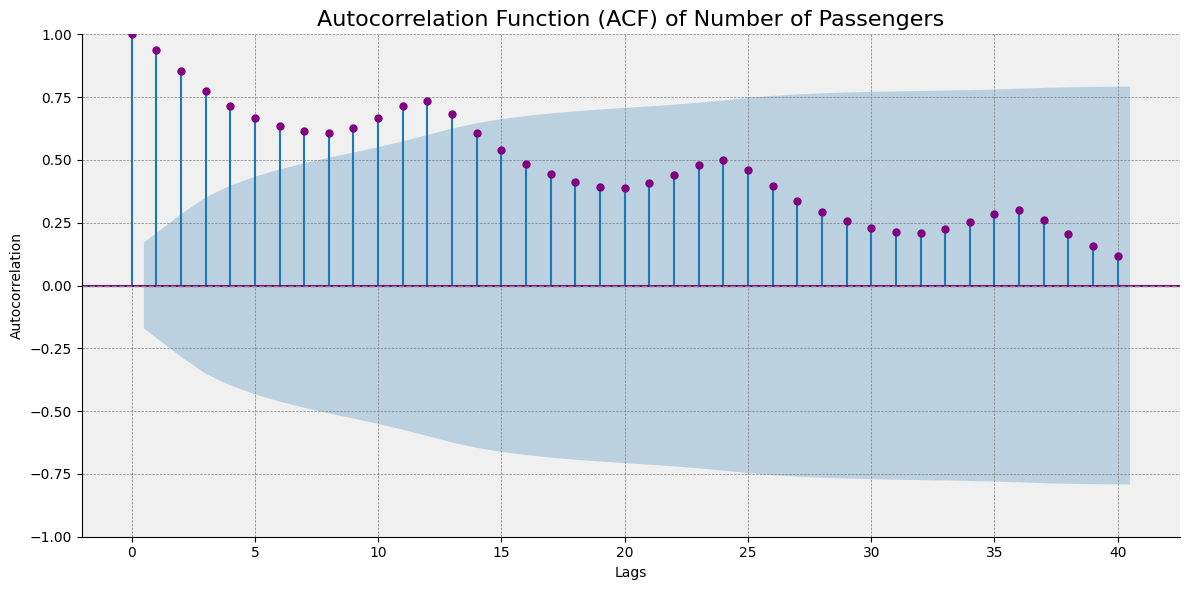

In [12]:


# Ensure 'data' is correctly defined in your environment
series = data['#Passengers']

# Plot ACF with enhanced colors and aesthetics
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(series, ax=ax, lags=40, color='purple')

# Customize colors
for line in ax.get_lines():
    line.set_color('purple')

# Adding customizations
ax.title.set_text('Autocorrelation Function (ACF) of Number of Passengers')
ax.title.set_fontsize(16)
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
ax.set_facecolor('#f0f0f0')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlighting the zero line
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()



In [43]:
# Calculate autocorrelation
acf_values = acf(series, nlags=40)  # Calculate ACF values up to 40 lags

# Print the autocorrelation values
print("Autocorrelation Values:")
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: {value:.4f}")

Autocorrelation Values:
Lag 0: 1.0000
Lag 1: 0.9393
Lag 2: 0.8548
Lag 3: 0.7751
Lag 4: 0.7128
Lag 5: 0.6686
Lag 6: 0.6335
Lag 7: 0.6144
Lag 8: 0.6084
Lag 9: 0.6286
Lag 10: 0.6665
Lag 11: 0.7136
Lag 12: 0.7350
Lag 13: 0.6820
Lag 14: 0.6064
Lag 15: 0.5390
Lag 16: 0.4856
Lag 17: 0.4459
Lag 18: 0.4130
Lag 19: 0.3941
Lag 20: 0.3872
Lag 21: 0.4074
Lag 22: 0.4392
Lag 23: 0.4815
Lag 24: 0.5007
Lag 25: 0.4581
Lag 26: 0.3947
Lag 27: 0.3373
Lag 28: 0.2926
Lag 29: 0.2552
Lag 30: 0.2286
Lag 31: 0.2116
Lag 32: 0.2081
Lag 33: 0.2245
Lag 34: 0.2515
Lag 35: 0.2840
Lag 36: 0.2992
Lag 37: 0.2621
Lag 38: 0.2056
Lag 39: 0.1590
Lag 40: 0.1195


In [44]:
data['#Passengers'].corr(data['#Passengers'].shift(1))

0.9534698127349908

In [45]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12


C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [47]:
print(test_data.columns)


Index(['#Passengers', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6',
       'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12'],
      dtype='object')


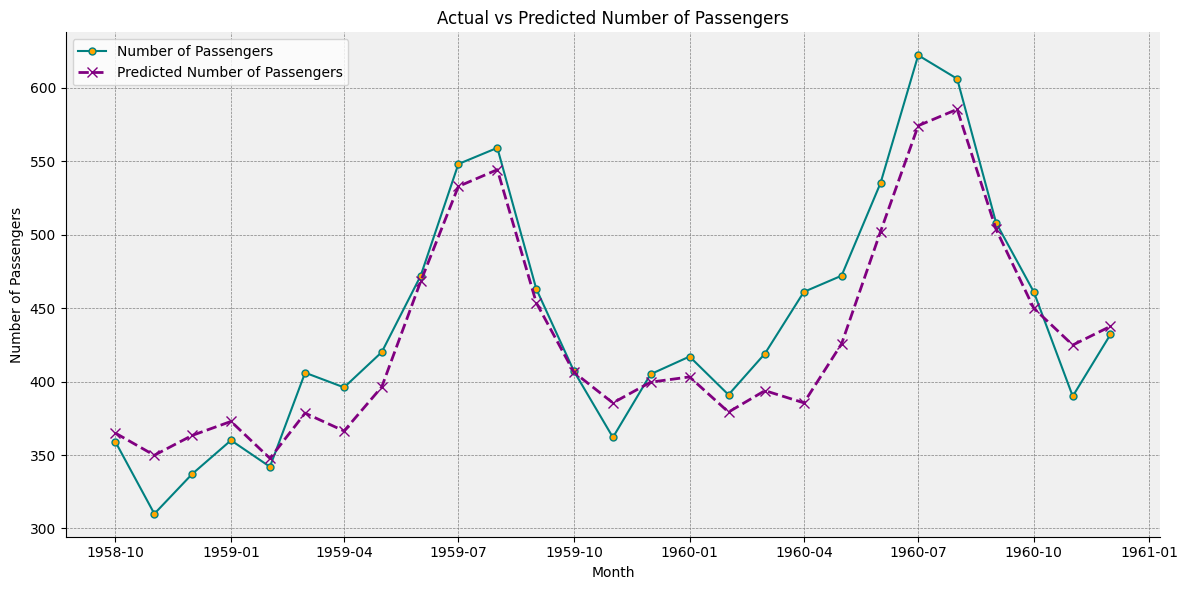

In [48]:
import matplotlib.pyplot as plt

# Assuming the index represents months
plt.figure(figsize=(12, 6))

# Plotting the actual number of passengers with custom styles
plt.plot(test_data.index, y_test, label='Number of Passengers', color='teal', linestyle='-', marker='o', markerfacecolor='orange', markersize=5)

# Plotting the predicted number of passengers with custom styles
plt.plot(test_data.index, y_pred, label='Predicted Number of Passengers', linestyle='--', color='purple', linewidth=2, marker='x', markerfacecolor='red', markersize=7)

# Adding labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Number of Passengers')
plt.legend()

# Customizing the grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('#f0f0f0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()




C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


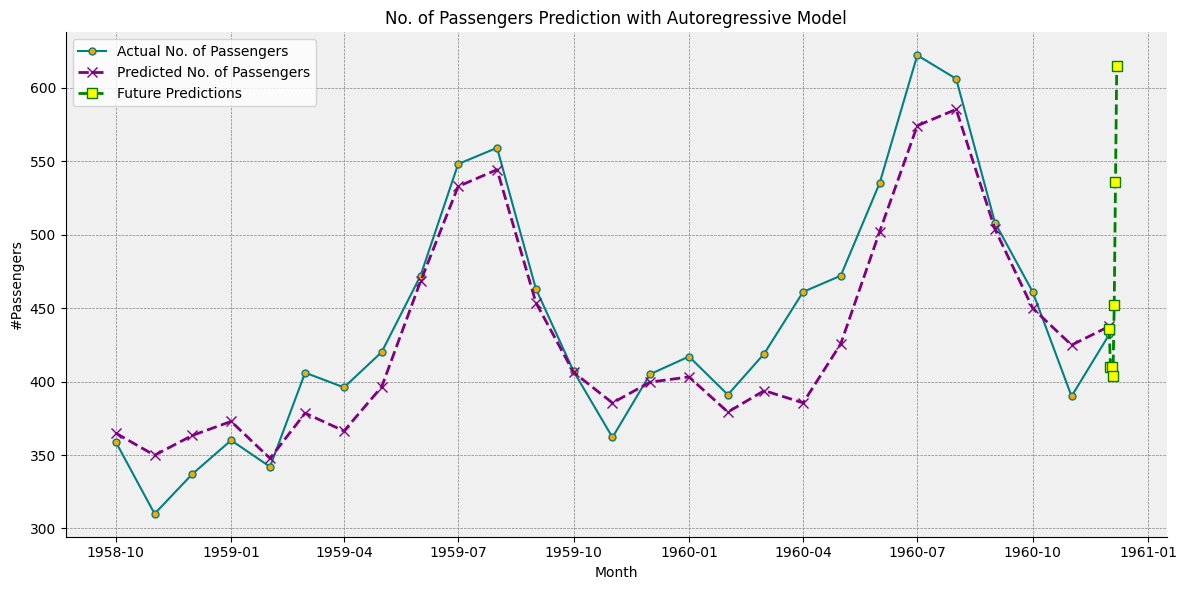

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the number of future time steps you want to predict (1 week)
forecast_steps = 7

# Extend the predictions into the future for one year
future_indices = range(len(test_data), len(test_data) + forecast_steps)
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) + forecast_steps - 1, dynamic=False)

# Create date indices for the future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=forecast_steps, freq='D')

# Plot the actual data, existing predictions, and one year of future predictions with interesting colors
plt.figure(figsize=(12, 6))

# Plotting the actual number of passengers with custom styles
plt.plot(test_data.index, y_test, label='Actual No. of Passengers', color='teal', linestyle='-', marker='o', markerfacecolor='orange', markersize=5)

# Plotting the predicted number of passengers with custom styles
plt.plot(test_data.index, y_pred, label='Predicted No. of Passengers', linestyle='--', color='purple', linewidth=2, marker='x', markerfacecolor='red', markersize=7)

# Plotting the future predictions with custom styles
plt.plot(future_dates, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='green', linewidth=2, marker='s', markerfacecolor='yellow', markersize=7)

# Adding labels, title, and legend
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('No. of Passengers Prediction with Autoregressive Model')
plt.legend()

# Customizing the grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('#f0f0f0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



In [50]:
# Define the array
passenger_data = np.array([125, 145, 186, 131, 151, 192, 137, 157, 198, 143, 163, 204])

# Calculate the moving average with a window size of 3
window_size = 3
moving_average = np.convolve(passenger_data, np.ones(window_size), 'valid') / window_size

# Display the original data and the moving average
print("Original Data:", passenger_data)
print("Moving Average:", moving_average)

Original Data: [125 145 186 131 151 192 137 157 198 143 163 204]
Moving Average: [152. 154. 156. 158. 160. 162. 164. 166. 168. 170.]


            #Passengers  SMA30  Moving_Average
Month                                         
1950-01-01          115    NaN             NaN
1950-02-01          126    NaN             NaN
1950-03-01          141    NaN      127.333333
1950-04-01          135    NaN      134.000000
1950-05-01          125    NaN      133.666667
1950-06-01          149    NaN      136.333333
1950-07-01          170    NaN      148.000000
1950-08-01          170    NaN      163.000000
1950-09-01          158    NaN      166.000000
1950-10-01          133    NaN      153.666667
1950-11-01          114    NaN      135.000000
1950-12-01          140    NaN      129.000000
1951-01-01          145    NaN      133.000000
1951-02-01          150    NaN      145.000000
1951-03-01          178    NaN      157.666667


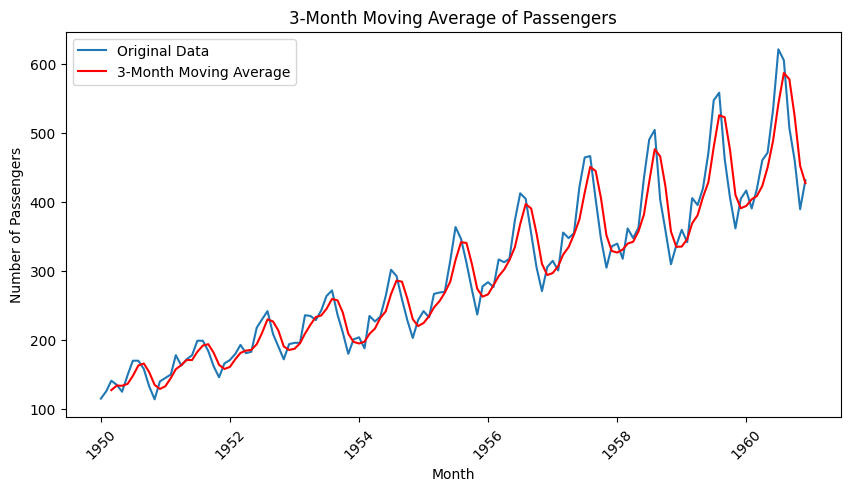

In [51]:


# Calculate the moving average with a window size of 3 months
window_size = 3
data['Moving_Average'] = data['#Passengers'].rolling(window=window_size).mean()

# Display the first few rows of the dataset with the moving average
print(data.head(15))

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(data.index, data['Moving_Average'], label='3-Month Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('3-Month Moving Average of Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.show()




In [52]:

# Extract 'Close' column and convert to DataFrame
data = data['#Passengers'].to_frame()
# Calculate 30-day Simple Moving Average (SMA)
data['SMA30'] = data['#Passengers'].rolling(30).mean()

<Axes: xlabel='Month'>

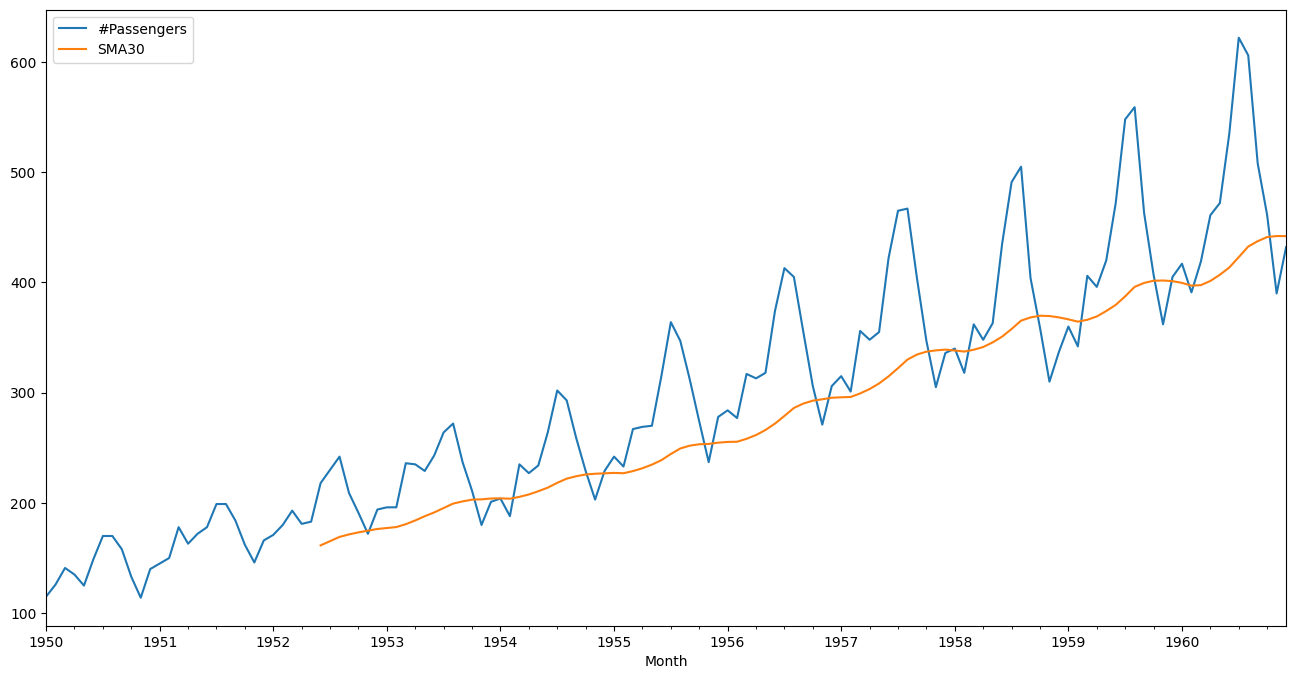

In [53]:
data[['#Passengers', 'SMA30']].plot(label='Data', 
                                  figsize=(16, 8))

ADF Statistic: 0.6881294666354638
p-value: 0.9895979711742351
ADF Statistic: -2.0371858348564427
p-value: 0.270510077140349


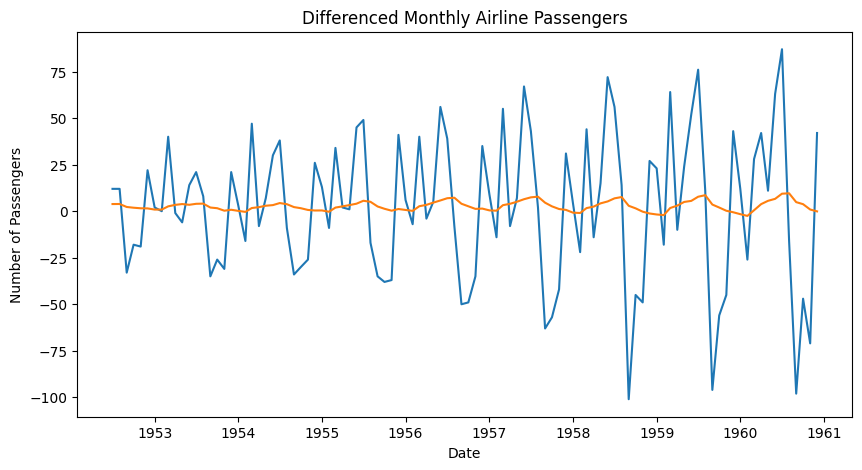

In [54]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
data_diff = data.diff().dropna()

# Check for stationarity again
result = adfuller(data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [55]:
endog = data_diff['#Passengers']

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming endog is the selected univariate time series
model = ARIMA(endog, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  102
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -508.372
Date:                Tue, 23 Jul 2024   AIC                           1024.745
Time:                        10:07:48   BIC                           1035.245
Sample:                    07-01-1952   HQIC                          1028.996
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3510      4.742      0.496      0.620      -6.943      11.645
ar.L1         -0.4581      0.157     -2.913      0.004      -0.766      -0.150
ma.L1          0.8792      0.094      9.324      0.0

C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\71548\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


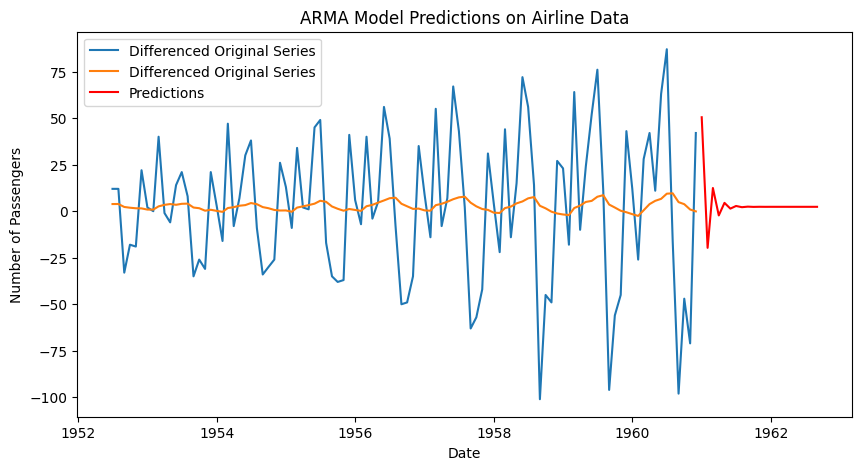

In [57]:
# Make predictions
start = len(data_diff)
end = start + 20
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()